## Import Modules

In [72]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
from models.transform import transform_issues
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive
import numpy as np
from IPython.display import HTML

In [73]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Create a dataframe of issues

In [2]:
# create a dataframe of issues from all the repos
issues = transform_issues()

In [59]:
# create a copy of issues
df=issues.copy()

## Select what to display per issue

In [62]:
df = data[['repo','title', 'user_', 'state', 'url', 'created_at','assignee']]

## view the first two issues

In [65]:
display(df.head(2))

,repo,title,user_,state,url,created_at,assignee
0,aws-jmeter-test-engine-v1,Setup continuous integration with GitHub Actions,NadHodeGW,open,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine-v1/issues/14,2020-09-29T17:40:46Z,uzfarid
1,aws-jmeter-test-engine-v1,Tune Linux machine to be able to run 5000 concurrent users,NadHodeGW,open,https://api.github.com/repos/k8-proxy/aws-jmeter-test-engine-v1/issues/13,2020-09-29T16:44:41Z,uzfarid


## Issues Per Repo

In [66]:
items = ['All']+sorted(df['repo'].unique().tolist())
def view(Repo=''):
    if Repo=="All": display(df)
    display(df[df.repo==Repo].reset_index(drop=True))
w = widgets.Select(options=items)

In [67]:
interactive(view, Repo=w)

interactive(children=(Select(description='Repo', options=('All', 'Open-Source', 'aws-jmeter-test-engine-v1', '…

 ## Issues Per User

In [9]:
items = ['All']+sorted(df['user_'].tolist())
def view(User=''):
    if User=="All": display(df)
    display(df[df.user_==User].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, User=w)

interactive(children=(Select(description='User', options=('All', 'AndresJim', 'GINAGC', 'IslamHeggy', 'MaNe202…

## Issues Per Assignee

In [50]:
items = ['All']+df.assignee.explode().unique().tolist()
items = [x for x in items if x is not None]
def view(Assignee=''):
    if Assignee=="All": display(df)
    display(df[df.assignee==Assignee].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, Assignee=w)

interactive(children=(Select(description='Assignee', options=('All', 'uzfarid', 'gmuditdce', 'kumarsudhish', '…

## Word Cloud of Users

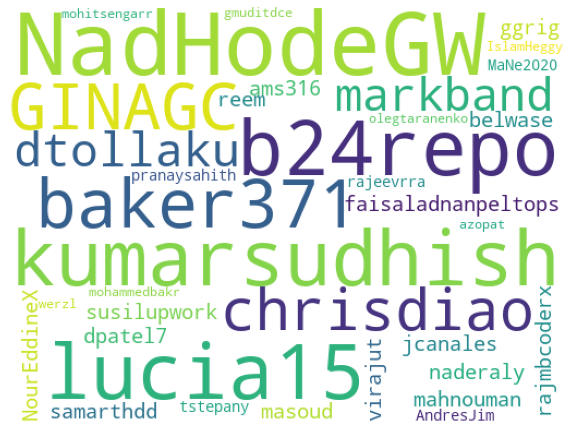

In [68]:
x2011 = df.user_.unique()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

## Word Cloud of Repos

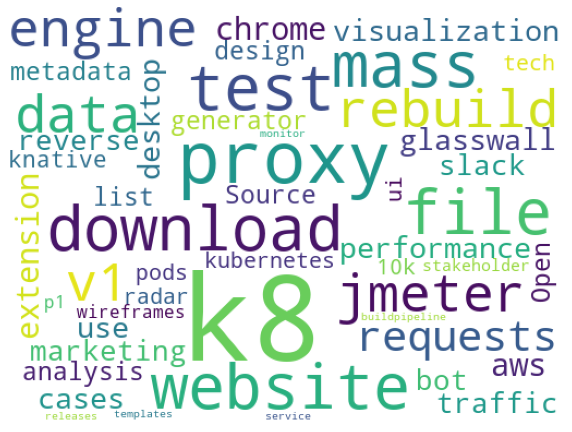

In [69]:
x2011 = df.repo.unique()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

## Word Cloud of Assignees

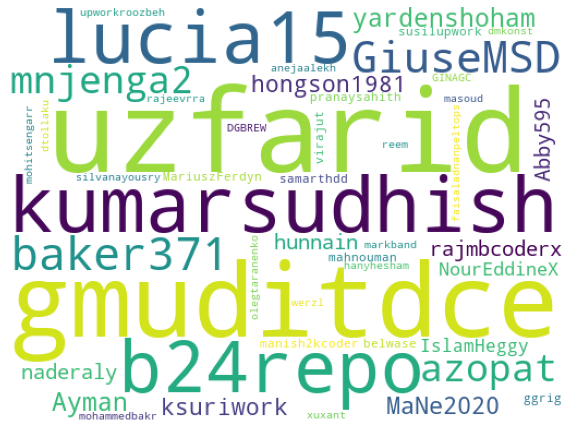

In [70]:
x2011 = df.assignee.explode().unique().tolist()
x2011 = [x for x in x2011 if x is not None]
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()